<a href="https://colab.research.google.com/github/Elisha-Hart/Access-The-String-Using-Slicing-And-Indexing-Assignment/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Hyperparameter optimization library
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# Machine learning model
from catboost import CatBoostClassifier, Pool

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost.utils import get_confusion_matrix

# Random state
RS = 2137



In [259]:
!pip install xgboost
!pip install catboost

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from scipy import stats as st
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

In [7]:
train = pd.read_csv('/content/train.csv', index_col='PassengerId')
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [208]:
train = pd.read_csv('/content/train.csv', index_col='Transported')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
True,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
False,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
False,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
True,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, False to True
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 891.4+ KB


In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [204]:
train['HomePlanet'].unique().tolist()

['Europa', 'Earth', 'Mars']

In [205]:
train['HomePlanet']=train['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
train['HomePlanet'].value_counts()

1    5269
0    1700
Name: HomePlanet, dtype: int64

In [209]:
test = pd.read_csv('/content/test.csv', index_col='PassengerId')
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [211]:
test['HomePlanet']=test['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
test['HomePlanet'].value_counts()

1.0    3188
0.0    1002
Name: HomePlanet, dtype: int64

In [213]:
train['VIP'].unique().tolist()

[False, True, nan]

In [214]:
train['VIP']=train['VIP'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [215]:
test['VIP']=test['VIP'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
test['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [217]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
FoodCourt,183
Spa,183


In [218]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
test= test.select_dtypes(include=[np.number]).interpolate().dropna()

sum(train.isnull().sum() != 0)

0

In [15]:
data = pd.read_csv("/content/sample_submission.csv" , encoding_errors = "ignore")

In [16]:
data.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [18]:
data.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


In [17]:
data.shape

(4277, 2)

In [19]:
data.describe(include = "all")

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


In [20]:
data.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

In [22]:
continuous_data = ["PassengerId","Transported"]

In [24]:
data.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [39]:
train[['Cabin', 'RoomService', 'Name', 'HomePlanet', 'Destination', 'VIP', 'CryoSleep']].value_counts().head(40)

Cabin    RoomService  Name               HomePlanet  Destination    VIP    CryoSleep
A/0/P    0.0          Kleeiak Coning     Europa      TRAPPIST-1e    False  True         1
F/859/P  0.0          Wafros Fla         Mars        TRAPPIST-1e    False  True         1
                      Lidex Opité        Mars        TRAPPIST-1e    False  True         1
F/858/P  0.0          Thery Burnerez     Earth       55 Cancri e    False  False        1
F/857/S  176.0        Cank Sad           Mars        TRAPPIST-1e    False  False        1
F/857/P  59.0         Coren Armstromez   Earth       TRAPPIST-1e    False  False        1
F/856/S  686.0        Yolana Stannondez  Earth       TRAPPIST-1e    False  False        1
F/856/P  1363.0       Puffs Facle        Mars        55 Cancri e    False  False        1
         128.0        Barks Flell        Mars        TRAPPIST-1e    False  False        1
         12.0         Cinkes Flell       Mars        TRAPPIST-1e    False  False        1
         0.0   

**EDA**

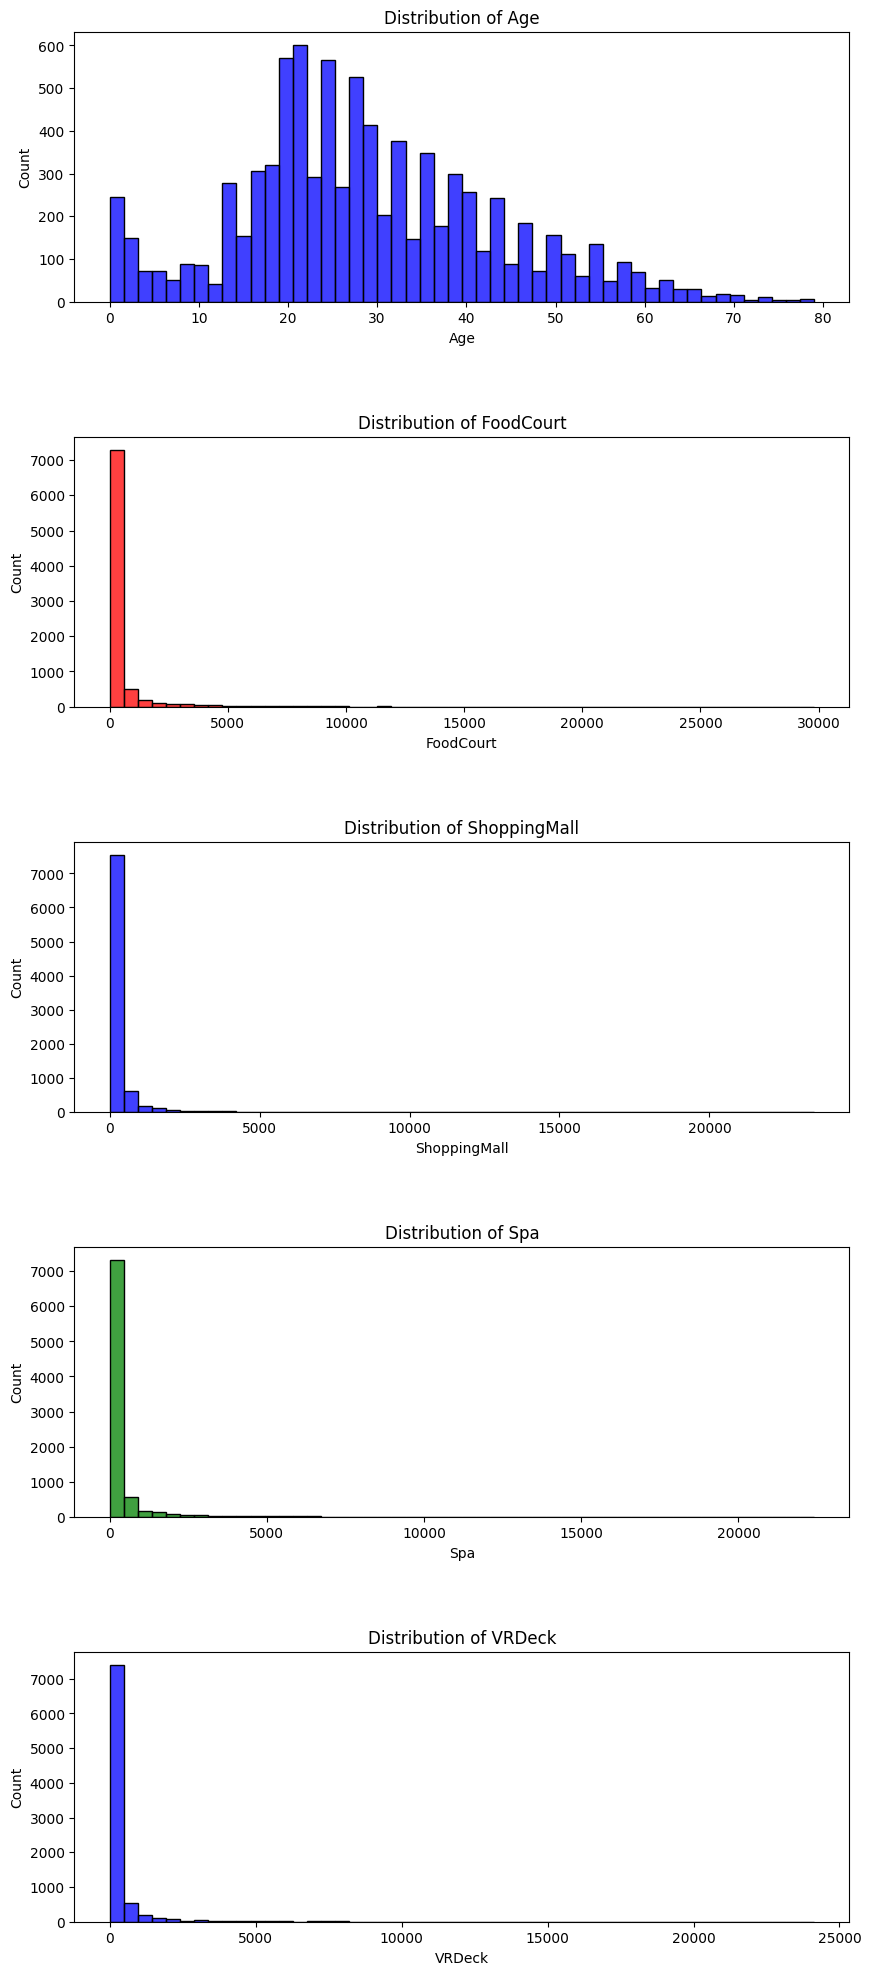

In [153]:
# Creating a 5-row subplot with histograms
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(top=2)

# Plotting histograms for each column
sns.histplot(train['Age'], color='b', bins=50, ax=ax[0])
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")
ax[0].set_title("Distribution of Age")

sns.histplot(train['FoodCourt'], color='r', bins=50, ax=ax[1])
ax[1].set_xlabel("FoodCourt")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of FoodCourt")

sns.histplot(train['ShoppingMall'], color='b', bins=50, ax=ax[2])
ax[2].set_xlabel("ShoppingMall")
ax[2].set_ylabel("Count")
ax[2].set_title("Distribution of ShoppingMall")

sns.histplot(train['Spa'], color='g', bins=50, ax=ax[3])
ax[3].set_xlabel("Spa")
ax[3].set_ylabel("Count")
ax[3].set_title("Distribution of Spa")

sns.histplot(train['VRDeck'], color='b', bins=50, ax=ax[4])
ax[4].set_xlabel("VRDeck")
ax[4].set_ylabel("Count")
ax[4].set_title("Distribution of VRDeck")

# Adjusting space between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

In [155]:
# Perform correlation analysis
correlation_matrix = train.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.069383   0.129808      0.033657  0.123796   
RoomService   0.069383     1.000000  -0.014069      0.056459  0.011650   
FoodCourt     0.129808    -0.014069   1.000000     -0.012396  0.222947   
ShoppingMall  0.033657     0.056459  -0.012396      1.000000  0.015518   
Spa           0.123796     0.011650   0.222947      0.015518  1.000000   
VRDeck        0.101498    -0.017810   0.229132     -0.005643  0.154972   
TotalSpent    0.186530     0.239169   0.745270      0.223682  0.596960   
CabNumber    -0.130471    -0.011659  -0.177216      0.000863 -0.125311   

                VRDeck  TotalSpent  CabNumber  
Age           0.101498    0.186530  -0.130471  
RoomService  -0.017810    0.239169  -0.011659  
FoodCourt     0.229132    0.745270  -0.177216  
ShoppingMall -0.005643    0.223682   0.000863  
Spa           0.154972    0.596960  -0.125311  
VRDeck        1.000000   

<ipython-input-155-7e2446ac384f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


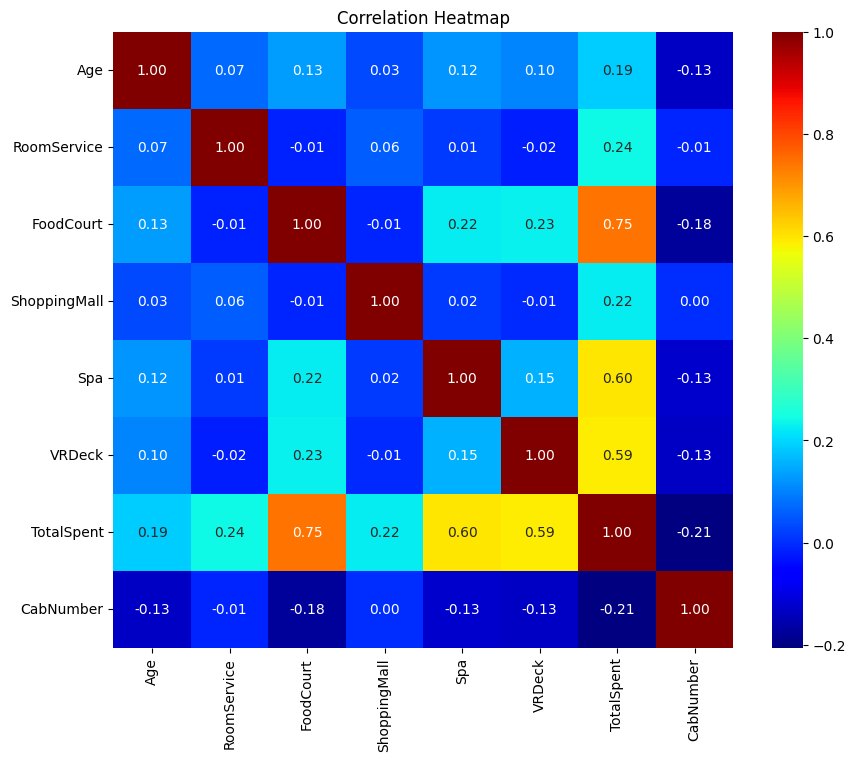

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Data Cleaning**

In [179]:

train[['Age', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['Age', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)

train['Age'].fillna(train['Age'].median(), inplace=True)


train['Age'] = train['Age'].astype(int)


train['CryoSleep'] = train['CryoSleep'].astype(int)


train['PassengerId'] = train['PassengerId'].astype(int)

In [183]:
def split_dataset(train, test_ratio=0.20):
    test_indices = np.random.rand(len(train)) < test_ratio
    return train[~test_indices], train[test_indices]

In [184]:
train, valid_data = split_dataset(train)
print("{} examples in training, {} examples in testing.".format(len(train), len(valid_data)))

6969 examples in training, 1724 examples in testing.


In [195]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [223]:
train.nunique().sort_values(ascending=False)

FoodCourt       1577
Spa             1397
VRDeck          1356
RoomService     1344
ShoppingMall    1177
Age              119
dtype: int64

In [83]:
data["Transported"]

0       False
1       False
2       False
3       False
4       False
        ...  
4272    False
4273    False
4274    False
4275    False
4276    False
Name: Transported, Length: 4277, dtype: bool

In [82]:
data["PassengerId"]

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [84]:
data["PassengerId"].min()

'0013_01'

In [85]:
data["PassengerId"].max()

'9277_01'

**EDA**

In [275]:
def plot_categorical_data(index, values):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  plt.pie(x = values, labels = index, autopct='%1.0f%%')
  plt.subplot(1,2,2)
  sns.barplot(y = index, x = values, orient = "h")
  plt.grid();
  plt.show()

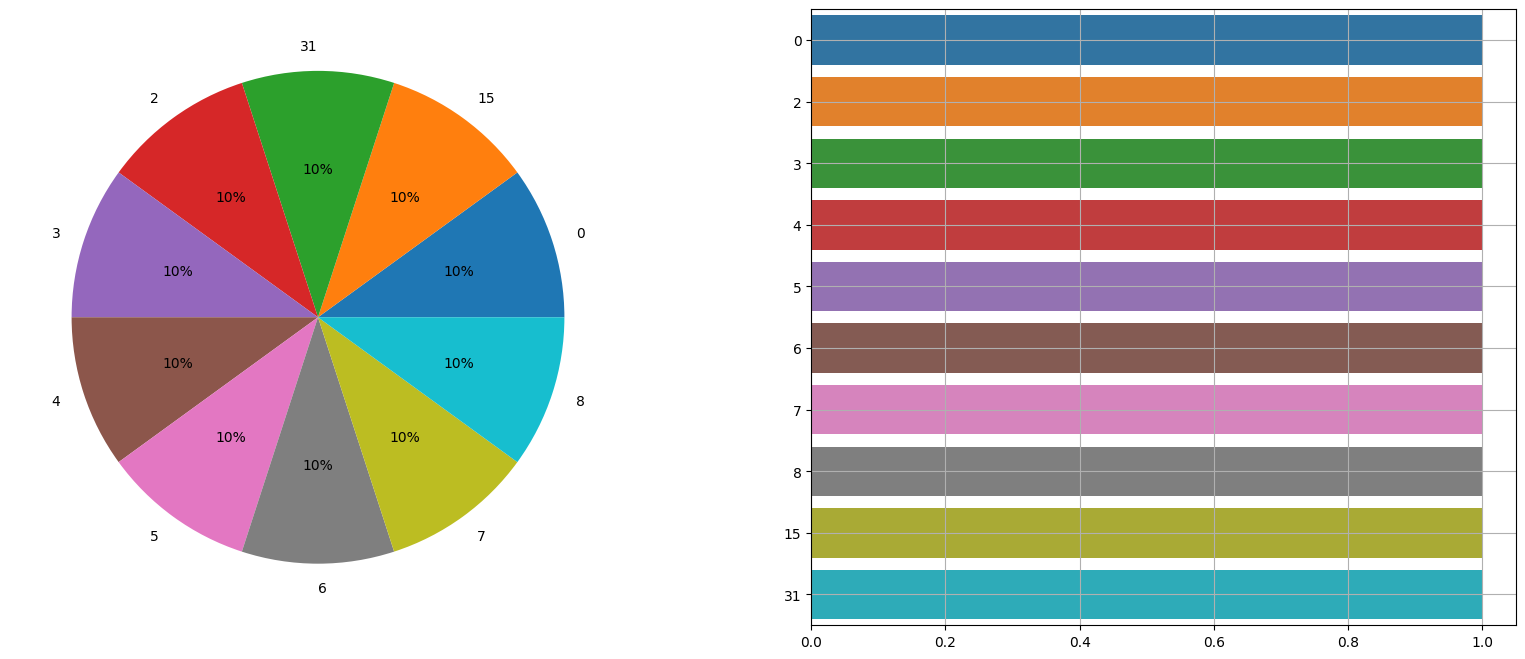

In [276]:
index = data["PassengerId"].astype(object).value_counts().sort_values(ascending = False).head(10).index
values = data["PassengerId"].astype(object).value_counts().sort_values(ascending = False).head(10).values
plot_categorical_data(index, values)



In [277]:
def plot_continious_data(data, col):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  plt.hist(data)
  plt.subplot(1,2,2)
  sns.boxplot(y = col, data=data)
  plt.grid();
  plt.show();

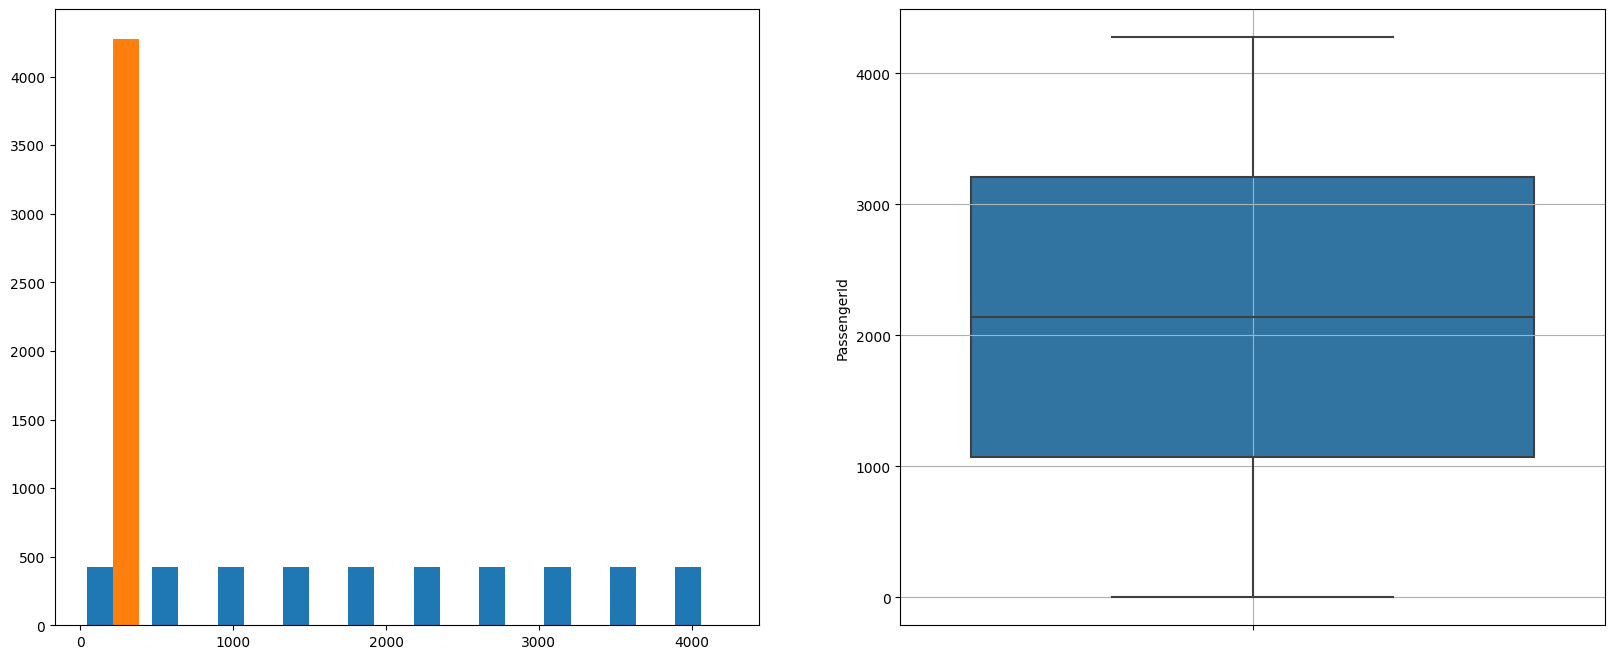

In [278]:
plot_continious_data (data, "PassengerId")


In [86]:
data.corr()

<ipython-input-86-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Transported
Transported,NaN


In [89]:
data.dtypes

PassengerId    object
Transported      bool
dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_list = []
for col in data.columns:
  if data[col].dtypes == "object":
    data[col] = encoder.fit_transform(data[col])

In [91]:
data.head()

,PassengerId,Transported
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [279]:
data.tail()

,PassengerId,Transported
4272,4272,False
4273,4273,False
4274,4274,False
4275,4275,False
4276,4276,False


**Modeling**

In [97]:
train.drop(columns=['Destination', 'VIP'], inplace=True)

In [101]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Age             179
RoomService     103
FoodCourt       102
ShoppingMall    100
Spa             112
VRDeck          102
TotalSpent        0
CabLetter         0
CabNumber         0
CabSide           0
dtype: int64

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, False to True
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Age           8514 non-null   float64
 4   RoomService   8590 non-null   float64
 5   FoodCourt     8591 non-null   float64
 6   ShoppingMall  8593 non-null   float64
 7   Spa           8581 non-null   float64
 8   VRDeck        8591 non-null   float64
 9   TotalSpent    8693 non-null   float64
 10  CabLetter     8693 non-null   object 
 11  CabNumber     8693 non-null   int64  
 12  CabSide       8693 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 891.4+ KB


In [284]:
from sklearn.model_selection import train_test_split as tts
X,y = data.drop(["Transported"], axis = 1), data["Transported"]

In [285]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [290]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25)

In [295]:
# Training the KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [297]:
predictions_knn = knn.predict(X_test)

In [299]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           "log_reg_predictions":log_reg,
                           "KNN_predictions":predictions_knn})

In [300]:
results_df

,Actual_Predictions,log_reg_predictions,KNN_predictions
3879,False,LogisticRegression(),False
1255,False,LogisticRegression(),False
2498,False,LogisticRegression(),False
644,False,LogisticRegression(),False
2799,False,LogisticRegression(),False
...,...,...,...
293,False,LogisticRegression(),False
1806,False,LogisticRegression(),False
545,False,LogisticRegression(),False
2927,False,LogisticRegression(),False


In [313]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
test = test.select_dtypes(include=[np.number]).interpolate().dropna()

sum(train.isnull().sum() != 0)

0

In [301]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}


In [302]:
grid_search = GridSearchCV

In [303]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [307]:
from sklearn import preprocessing
data = datasets.load_iris()

X_data = data.data
target = data.target

standard = preprocessing.scale(X_data)
print(standard)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [316]:
X

,PassengerId
0,0
1,1
2,2
3,3
4,4
...,...
4272,4272
4273,4273
4274,4274
4275,4275


In [317]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
4272    False
4273    False
4274    False
4275    False
4276    False
Name: Transported, Length: 4277, dtype: bool

In [318]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [319]:
model.fit

<bound method LogisticRegression.fit of LogisticRegression()>

In [320]:
model

LogisticRegression()

In [321]:
model.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

In [323]:
X_test.values

array([[3879],
       [1255],
       [2498],
       ...,
       [ 545],
       [2927],
       [1912]])

In [322]:
y_test.values

array([False, False, False, ..., False, False, False])

In [325]:
predicted_data = pd.DataFrame(y_test.values)

In [326]:
predicted_data

,0
0,False
1,False
2,False
3,False
4,False
...,...
1065,False
1066,False
1067,False
1068,False


In [327]:
predicted_data.reset_index()

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1065,1065,False
1066,1066,False
1067,1067,False
1068,1068,False


In [328]:
predicted_data.reset_index(inplace = True)

In [334]:
from sklearn import svm

In [329]:
columns = ["Actual_PassengerId", "Predicted_PassengerId"]
predicted_data.columns = columns

In [332]:
X,y = datasets.load_iris(return_X_y=True)

In [331]:
predicted_data

,Actual_PassengerId,Predicted_PassengerId
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
1065,1065,False
1066,1066,False
1067,1067,False
1068,1068,False


In [330]:
model.predict
print(X_test)

      PassengerId
3879         3879
1255         1255
2498         2498
644           644
2799         2799
...           ...
293           293
1806         1806
545           545
2927         2927
1912         1912

[1070 rows x 1 columns]


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
data.head()

,PassengerId,Transported
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [110]:
from sklearn.model_selection import train_test_split
X = data.drop(['Transported'], axis = 1)
y = data['Transported']

In [111]:
X_train , X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2)

In [112]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((3421, 1), (3421,), (856, 1), (856,))

In [246]:
X_train = train.drop("FoodCourt", axis=1)
y_train = train["FoodCourt"]
X_test  = test
X_train.shape, y_train.shape, X_test.shape

((8693, 5), (8693,), (4277, 7))

In [113]:
data.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [139]:
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    QuantileTransformer(output_distribution='normal', random_state=RS),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', drop='first')
)

column_transformer = make_column_transformer(
    # Numerical Columns
    (
        numerical_pipeline,
        make_column_selector(dtype_include=['float64', 'int64'])
    ),
    # Categorical columns
    (
        categorical_pipeline,
        ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabLetter', 'CabSide']
    ),
    (
        make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)
        ),
        ['Surname']
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [256]:
!pip install xgboost
!pip install catboost

In [341]:
import catboost
from sklearn.metrics import r2_score

models_list = [LinearRegression(),
               DecisionTreeRegressor(),
               RandomForestRegressor(),
               KNeighborsRegressor(),
               SVR(),
               BaggingRegressor(),
               xgb.XGBRegressor(objective = 'reg:linear',
                                n_estimators = 10, seed = 123),
                       catboost.CatBoostRegressor(loss_function="RMSE")]
train_score_list = []
test_score_list = []
model_name_list = []
for model in models_list:
  model_name_list.append(str(model))
  model.fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)
  train_score = r2_score(predictions_train, y_train)
  test_score = r2_score(predictions_test,y_test)
  train_score_list.append(train_score)
  test_score_list.append(test_score)


scores_df = pd.DataFrame ({"Model Name ": model_name_list,
                            "Train Score ": train_score_list,
                            "Test Score ": test_score_list
                           })
scores_df


[00:17:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.027987
0:	learn: 0.8168540	total: 54.7ms	remaining: 54.6s
1:	learn: 0.7996034	total: 55.2ms	remaining: 27.5s
2:	learn: 0.7825159	total: 55.5ms	remaining: 18.4s
3:	learn: 0.7659974	total: 55.9ms	remaining: 13.9s
4:	learn: 0.7497557	total: 57.2ms	remaining: 11.4s
5:	learn: 0.7334104	total: 57.9ms	remaining: 9.6s
6:	learn: 0.7173714	total: 58.3ms	remaining: 8.27s
7:	learn: 0.7038518	total: 58.6ms	remaining: 7.27s
8:	learn: 0.6881651	total: 59ms	remaining: 6.5s
9:	learn: 0.6747197	total: 61.2ms	remaining: 6.06s
10:	learn: 0.6613553	total: 61.6ms	remaining: 5.54s
11:	learn: 0.6478201	total: 62ms	remaining: 5.1s
12:	learn: 0.6344271	total: 62.3ms	remaining: 4.73s
13:	learn: 0.6215302	total: 62.8ms	remaining: 4.42s
14:	learn: 0.6089100	total: 63.7ms	remaining: 4.18s
15:	learn: 0.5952242	total: 64ms	remaining: 3.94s
16:	learn: 0.5826693	total: 64.5ms	rem

,Model Name,Train Score,Test Score
0,LinearRegression(),0.949538,0.862591
1,DecisionTreeRegressor(),1.000000,0.916045
2,RandomForestRegressor(),0.993919,0.921461
3,KNeighborsRegressor(),0.988290,0.926040
4,SVR(),0.953995,0.887713
5,BaggingRegressor(),0.995630,0.923284
6,"XGBRegressor(base_score=None, booster=None, ca...",0.995952,0.889209
7,<catboost.core.CatBoostRegressor object at 0x7...,0.999867,0.898446


In [342]:
scores_df.columns

Index(['Model Name ', 'Train Score ', 'Test Score '], dtype='object')

In [343]:
scores_df['Model Name ']

0                                   LinearRegression()
1                              DecisionTreeRegressor()
2                              RandomForestRegressor()
3                                KNeighborsRegressor()
4                                                SVR()
5                                   BaggingRegressor()
6    XGBRegressor(base_score=None, booster=None, ca...
7    <catboost.core.CatBoostRegressor object at 0x7...
Name: Model Name , dtype: object

In [345]:
scores_df

,Model Name,Train Score,Test Score
0,LinearRegression(),0.949538,0.862591
1,DecisionTreeRegressor(),1.000000,0.916045
2,RandomForestRegressor(),0.993919,0.921461
3,KNeighborsRegressor(),0.988290,0.926040
4,SVR(),0.953995,0.887713
5,BaggingRegressor(),0.995630,0.923284
6,"XGBRegressor(base_score=None, booster=None, ca...",0.995952,0.889209
7,<catboost.core.CatBoostRegressor object at 0x7...,0.999867,0.898446


**Hyperparameter Tuning**

In [347]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [348]:
models_list

[LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 KNeighborsRegressor(),
 SVR(),
 BaggingRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='reg:linear', predictor=None, ...),

In [349]:
param_grid_xgb = {"booster":["gbtree","gblinear","dart"],
                  "verbosity":[0,1,2,3],
                  "validate_parameters" : [True, False]}
grd_search = GridSearchCV(estimator = xgb.XGBRegressor(),
                         param_grid = param_grid_xgb,
                         n_jobs = -1,
                         scoring = "r2")

In [350]:
grd_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'validate_parameters': [True, False],
                         'verbosity': [0, 1, 2, 3]},
             scoring='r2')

In [351]:
grd_search.best_params_

{'booster': 'gblinear', 'validate_parameters': True, 'verbosity': 0}

In [352]:
xgb_tuned_grid_search = xgb.XGBRegressor(booster = 'gbtree',
                             validate_parameters = True,
                             verbosity = 0)

In [353]:
xgb_tuned_grid_search.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [354]:
xgb_tuned_grid_search_predictions_train = xgb_tuned_grid_search.predict(X_train)
xgb_tuned_grid_search_predictions_test = xgb_tuned_grid_search.predict(X_test)

In [355]:
r2_score(xgb_tuned_grid_search_predictions_train, y_train)

0.9999994641896588

In [356]:
r2_score(xgb_tuned_grid_search_predictions_test, y_test)

0.9075715941856066

In [366]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [367]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

In [368]:
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)


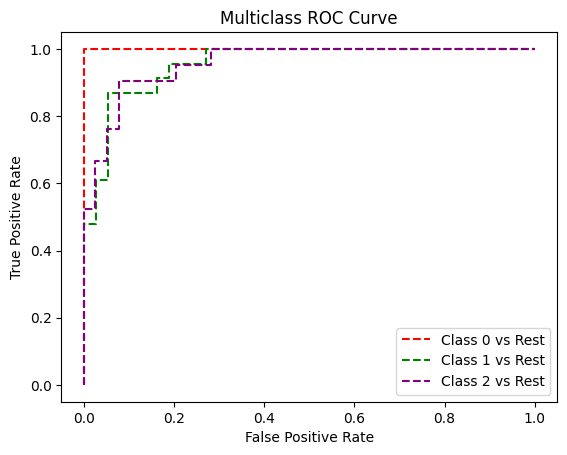

In [396]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='purple', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


In [370]:
from sklearn.metrics import classification_report

In [382]:
y_pred = clf.predict(X_test)


In [394]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [395]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.87      0.87        23
           2       0.86      0.86      0.86        21

    accuracy                           0.90        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.90      0.90      0.90        60

